In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import os
from tqdm import tqdm
from matplotlib_venn import venn2,venn3,venn2_circles
import string
from matplotlib.lines import Line2D

In [2]:
def name_type(x):
    if x.startswith('DECOY'):
        return 'DECOY_null'
    else:
        return 'SAMPLE'

In [3]:
dirname="../result/"
csodiaqfile=[
"CsoDIAq-file1_20190405_MCF7_FAIMS_01_1_corrected_peptideFDR.csv",
"CsoDIAq-file2_20190405_MCF7_FAIMS_01_2_corrected_peptideFDR.csv",
"CsoDIAq-file3_20190405_MCF7_FAIMS_02_1_corrected_peptideFDR.csv",
"CsoDIAq-file4_20190405_MCF7_FAIMS_02_2_corrected_peptideFDR.csv",
"CsoDIAq-file5_20190405_MCF7_FAIMS_03_1_corrected_peptideFDR.csv",
"CsoDIAq-file6_20190405_MCF7_FAIMS_03_2_corrected_peptideFDR.csv",
"CsoDIAq-file7_20190405_MCF7_FAIMS_04_1_corrected_peptideFDR.csv",
"CsoDIAq-file8_20190405_MCF7_FAIMS_04_2_corrected_peptideFDR.csv",
"CsoDIAq-file9_20190405_MCF7_FAIMS_05_1_corrected_peptideFDR.csv",
"CsoDIAq-file10_20190405_MCF7_FAIMS_05_2_corrected_peptideFDR.csv",
"CsoDIAq-file11_20190405_MCF7_FAIMS_06_1_corrected_peptideFDR.csv",
"CsoDIAq-file12_20190405_MCF7_FAIMS_06_2_corrected_peptideFDR.csv",
"CsoDIAq-file13_20190405_MCF7_FAIMS_07_1_corrected_peptideFDR.csv",
"CsoDIAq-file14_20190405_MCF7_FAIMS_07_2_corrected_peptideFDR.csv",
"CsoDIAq-file15_20190405_MCF7_FAIMS_08_1_corrected_peptideFDR.csv",
"CsoDIAq-file16_20190405_MCF7_FAIMS_08_2_corrected_peptideFDR.csv",]
REFIGSfile=[
"CsoDIAq-file1_20190405_MCF7_FAIMS_01_1_correctedNoFilter_withFeature_3cycle_7_1_LDA_ID.csv",
"CsoDIAq-file2_20190405_MCF7_FAIMS_01_2_correctedNoFilter_withFeature_3cycle_7_1_LDA_ID.csv",
"CsoDIAq-file3_20190405_MCF7_FAIMS_02_1_correctedNoFilter_withFeature_3cycle_8_2_LDA_ID.csv",
"CsoDIAq-file4_20190405_MCF7_FAIMS_02_2_correctedNoFilter_withFeature_3cycle_8_2_LDA_ID.csv",
"CsoDIAq-file5_20190405_MCF7_FAIMS_03_1_correctedNoFilter_withFeature_3cycle_8_2_LDA_ID.csv",
"CsoDIAq-file6_20190405_MCF7_FAIMS_03_2_correctedNoFilter_withFeature_3cycle_8_2_LDA_ID.csv",
"CsoDIAq-file7_20190405_MCF7_FAIMS_04_1_correctedNoFilter_withFeature_2cycle_8_1_LDA_ID.csv",
"CsoDIAq-file8_20190405_MCF7_FAIMS_04_2_correctedNoFilter_withFeature_2cycle_8_1_LDA_ID.csv",
"CsoDIAq-file9_20190405_MCF7_FAIMS_05_1_correctedNoFilter_withFeature_6cycle_2_1_LDA_ID.csv",
"CsoDIAq-file10_20190405_MCF7_FAIMS_05_2_correctedNoFilter_withFeature_6cycle_2_1_LDA_ID.csv",
"CsoDIAq-file11_20190405_MCF7_FAIMS_06_1_correctedNoFilter_withFeature_6cycle_2_1_LDA_ID.csv",
"CsoDIAq-file12_20190405_MCF7_FAIMS_06_2_correctedNoFilter_withFeature_6cycle_2_1_LDA_ID.csv",
"CsoDIAq-file13_20190405_MCF7_FAIMS_07_1_correctedNoFilter_withFeature_5cycle_2_1_LDA_ID.csv",
"CsoDIAq-file14_20190405_MCF7_FAIMS_07_2_correctedNoFilter_withFeature_5cycle_2_1_LDA_ID.csv",
"CsoDIAq-file15_20190405_MCF7_FAIMS_08_1_correctedNoFilter_withFeature_6cycle_2_1_LDA_ID.csv",
"CsoDIAq-file16_20190405_MCF7_FAIMS_08_2_correctedNoFilter_withFeature_6cycle_2_1_LDA_ID.csv",]

sample1 = []
sample2 = []
num1=[]
num2=[]
samplelist1=[]
samplelist2=[]
for filename in csodiaqfile:
    csodiaq_id_df = pd.read_csv(os.path.join(dirname,filename))
    csodiaq_id_df['protein'] = csodiaq_id_df['name'].apply(name_type)
    sample = csodiaq_id_df[csodiaq_id_df['protein']=='SAMPLE']
    num1.append(len(sample))
    sample1.extend(sample['peptide'])
    samplelist1.append(sample['peptide'])
# print(len(sample1))
for filename in REFIGSfile:
    csodiaq_id_df = pd.read_csv(os.path.join(dirname,filename))
    csodiaq_id_df['protein'] = csodiaq_id_df['name'].apply(name_type)
    sample = csodiaq_id_df[csodiaq_id_df['protein']=='SAMPLE']
    num2.append(len(sample))
    sample2.extend(sample['peptide'])
    samplelist2.append(sample['peptide'])
# print(len(sample2))
print("CsoDIAq: ",num1,"sum: ",sum(num1))
print("RE-FIGS: ",num2,"sum: ",sum(num2))

CsoDIAq:  [554, 637, 814, 952, 1015, 1167, 1104, 1245, 261, 258, 405, 475, 393, 480, 534, 576] sum:  10870
RE-FIGS:  [588, 676, 869, 1019, 1048, 1307, 1128, 1528, 258, 329, 406, 401, 447, 535, 565, 622] sum:  11726


Fix isolation = 2:
CsoDIAq:  [554, 637, 814, 952, 1015, 1167, 1104, 1245] sum:  7488
RE-FIGS:  [588, 676, 869, 1019, 1048, 1307, 1128, 1528] sum:  8163


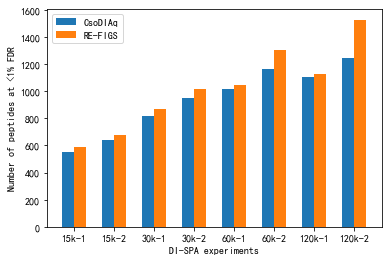

In [4]:
plt.rcParams['font.sans-serif'] = ['SimHei']

labels = ['15k-1', '15k-2','30k-1', '30k-2','60k-1', '60k-2','120k-1', '120k-2',]

x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, num1[:8], width, label='CsoDIAq')
rects2 = ax.bar(x + width/2, num2[:8], width, label='RE-FIGS')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('DI-SPA experiments')
ax.set_ylabel('Number of peptides at <1% FDR')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
print("Fix isolation = 2:")
print("CsoDIAq: ",num1[:8],"sum: ",sum(num1[:8]))
print("RE-FIGS: ",num2[:8],"sum: ",sum(num2[:8]))


Fix isolation = 6:
CsoDIAq:  [261, 258, 405, 475, 393, 480, 534, 576] sum:  3382
RE-FIGS:  [258, 329, 406, 401, 447, 535, 565, 622] sum:  3563


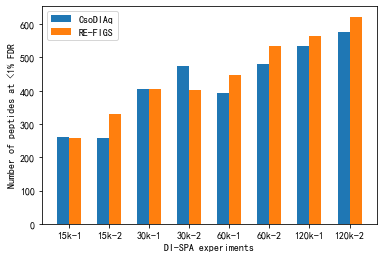

In [5]:
labels = ['15k-1', '15k-2','30k-1', '30k-2','60k-1', '60k-2','120k-1', '120k-2',]
x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, num1[8:], width, label='CsoDIAq')
rects2 = ax.bar(x + width/2, num2[8:], width, label='RE-FIGS')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('DI-SPA experiments')
ax.set_ylabel('Number of peptides at <1% FDR')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
print("Fix isolation = 6:")
print("CsoDIAq: ",num1[8:],"sum: ",sum(num1[8:]))
print("RE-FIGS: ",num2[8:],"sum: ",sum(num2[8:]))

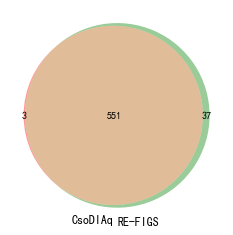

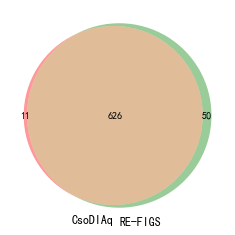

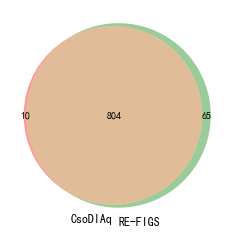

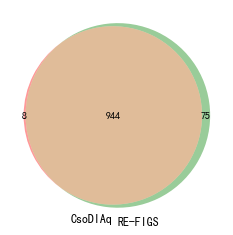

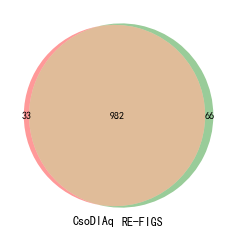

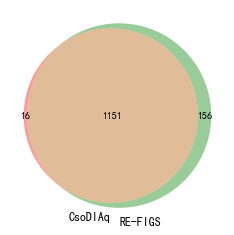

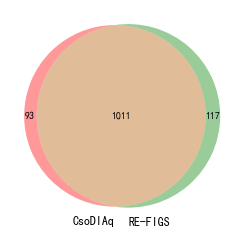

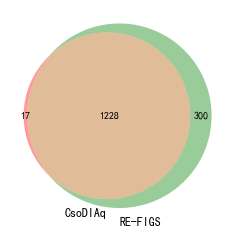

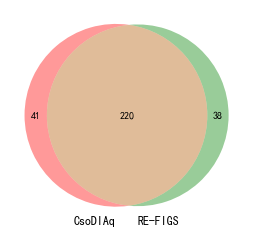

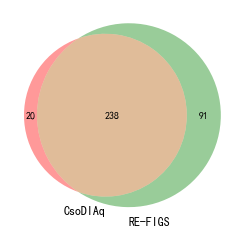

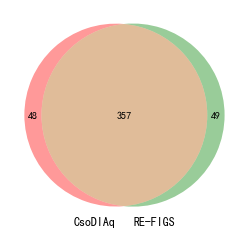

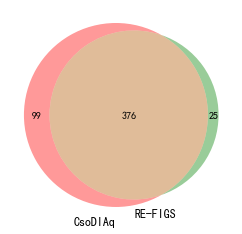

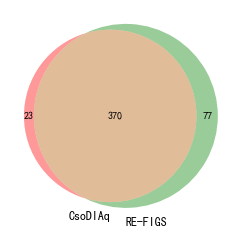

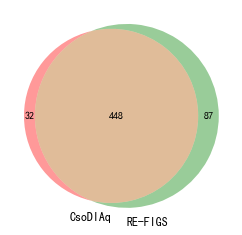

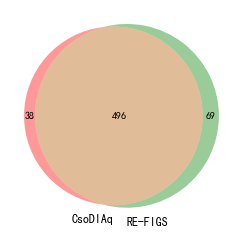

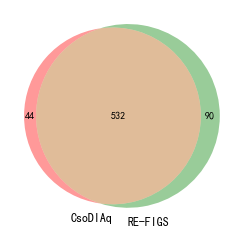

In [6]:
for i in range(0,16):
    venn2([set(samplelist1[i]),set(samplelist2[i])],['CsoDIAq','RE-FIGS'])
    plt.show()

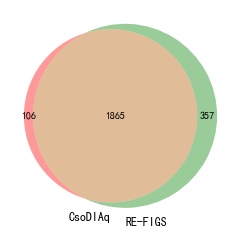

In [7]:
venn2([set(sample1),set(sample2)],['CsoDIAq','RE-FIGS'])

[554, 637, 814, 952, 1015, 1167, 1104, 1245, 261, 258, 405, 475, 393, 480, 534, 576]
[588, 676, 869, 1019, 1048, 1307, 1128, 1528, 258, 329, 406, 401, 447, 535, 565, 622]
[595, 883, 1091, 1174, 259, 440, 436, 555] [595, 883, 1091, 1174] [259, 440, 436, 555]
[632, 944, 1177, 1328, 293, 403, 491, 593] [632, 944, 1177, 1328] [293, 403, 491, 593]
CsoDIAq:  [595, 883, 1091, 1174] sum:  3743
RE-FIGS:  [632, 944, 1177, 1328] sum:  4081
CsoDIAq:  [259, 440, 436, 555] sum:  1690
RE-FIGS:  [293, 403, 491, 593] sum:  1780


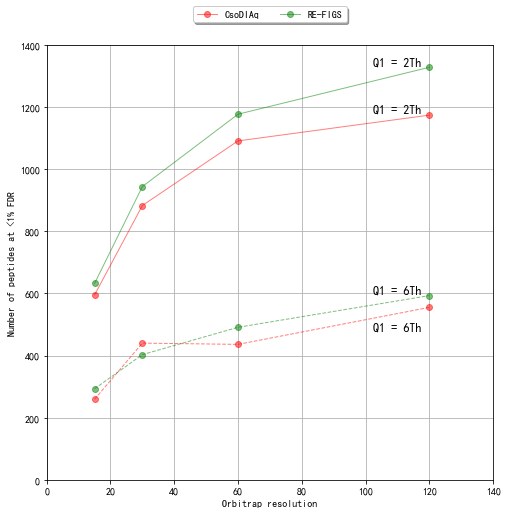

In [8]:
print(num1)
print(num2)
avg_num1=[int((num1[2*i]+num1[2*i+1])/2) for i in range(8)]
avg_num2=[int((num2[2*i]+num2[2*i+1])/2) for i in range(8)]
avg_num1_2=avg_num1[:4]
avg_num1_6=avg_num1[4:]
avg_num2_2=avg_num2[:4]
avg_num2_6=avg_num2[4:]
print(avg_num1,avg_num1_2,avg_num1_6)
print(avg_num2,avg_num2_2,avg_num2_6)
print("CsoDIAq: ",avg_num1_2,"sum: ",sum(avg_num1_2))
print("RE-FIGS: ",avg_num2_2,"sum: ",sum(avg_num2_2))
print("CsoDIAq: ",avg_num1_6,"sum: ",sum(avg_num1_6))
print("RE-FIGS: ",avg_num2_6,"sum: ",sum(avg_num2_6))

plt.figure(figsize=(8,8))
x_axis_data = [15,30,60,120]
        
#画图 
plt.plot(x_axis_data, avg_num1_2, 'ro-', alpha=0.5, linewidth=1, label='CsoDIAq')
plt.plot(x_axis_data, avg_num1_6, 'ro--', alpha=0.5, linewidth=1,)
plt.plot(x_axis_data, avg_num2_2, 'go-', alpha=0.5, linewidth=1, label='RE-FIGS')
plt.plot(x_axis_data, avg_num2_6, 'go--', alpha=0.5, linewidth=1,)

## 设置数据标签位置及大小
for a, b in zip(x_axis_data, avg_num1_2):
    if a==120:
        plt.text(a-10, b, "Q1 = 2Th", ha='center', va='bottom', fontsize=12)  #  ha='center', va='top'
for a, b1 in zip(x_axis_data, avg_num1_6):
    if a==120:
        plt.text(a-10, b1-80, "Q1 = 6Th", ha='center', va='bottom', fontsize=12)  
for a, b2 in zip(x_axis_data, avg_num2_2):
    if a==120:
        plt.text(a-10, b2, "Q1 = 2Th", ha='center', va='bottom', fontsize=12)
for a, b3 in zip(x_axis_data, avg_num2_6):
    if a==120:
        plt.text(a-10, b3, "Q1 = 6Th", ha='center', va='bottom', fontsize=12)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),fancybox=True, shadow=True, ncol=2)
plt.grid()

plt.xlabel('Orbitrap resolution')
plt.ylabel('Number of peptides at <1% FDR')#accuracy

plt.ylim(0,1400)#仅设置y轴坐标范围
plt.xlim(0,140)
plt.show()

In [9]:
print("CsoDIAq: ",avg_num1_2,"sum: ",sum(avg_num1_2))
print("RE-FIGS: ",avg_num2_2,"sum: ",sum(avg_num2_2))
print("CsoDIAq: ",avg_num1_6,"sum: ",sum(avg_num1_6))
print("RE-FIGS: ",avg_num2_6,"sum: ",sum(avg_num2_6))

CsoDIAq:  [595, 883, 1091, 1174] sum:  3743
RE-FIGS:  [632, 944, 1177, 1328] sum:  4081
CsoDIAq:  [259, 440, 436, 555] sum:  1690
RE-FIGS:  [293, 403, 491, 593] sum:  1780


In [10]:
avg_CsoDIAq=(sum(avg_num1_2)+sum(avg_num1_6))/8.0
avg_REFIGS=(sum(avg_num2_2)+sum(avg_num2_6))/8.0

In [11]:
avg_CsoDIAq

679.125

In [12]:
avg_REFIGS

732.625

In [13]:
avg_REFIGS/avg_CsoDIAq

1.078777839131235

In [14]:
REFIGSfilelists_100 = []
for i in range(1,101):
    REFIGSfilelists_100.append('CsoDIAq-file'+str(i)+'_20200719_MAGIC_MCF7_1128repro_'+'%02d'%(i)+'_correctedNoFilter_withFeature_1cycle_8_5_LDA_ID.csv')
csodiaqfilelists_100 = []
for i in range(1,101):
    csodiaqfilelists_100.append('CsoDIAq-file'+str(i)+'_20200719_MAGIC_MCF7_1128repro_'+'%02d'%(i)+'_corrected_peptideFDR.csv')
sample1_100 = []
sample2_100 = []
num1_100=[]
num2_100=[]
samplelist1_100=[]
samplelist2_100=[]
for filename in csodiaqfilelists_100:
    csodiaq_id_df = pd.read_csv(os.path.join(dirname,filename))
    csodiaq_id_df['protein'] = csodiaq_id_df['name'].apply(name_type)
    sample = csodiaq_id_df[csodiaq_id_df['protein']=='SAMPLE']
    num1_100.append(len(sample))
    sample1_100.extend(sample['peptide'])
    samplelist1_100.append(sample['peptide'])
# print(len(sample1))
for filename in REFIGSfilelists_100:
    csodiaq_id_df = pd.read_csv(os.path.join(dirname,filename))
    csodiaq_id_df['protein'] = csodiaq_id_df['name'].apply(name_type)
    sample = csodiaq_id_df[csodiaq_id_df['protein']=='SAMPLE']
    num2_100.append(len(sample))
    sample2_100.extend(sample['peptide'])
    samplelist2_100.append(sample['peptide'])
# print(len(sample2))
print("CsoDIAq: ",num1_100,sum(num1_100))
print("RE-FIGS: ",num2_100,sum(num2_100))

CsoDIAq:  [1544, 1646, 1616, 1449, 1457, 1674, 1583, 1930, 1839, 1614, 1743, 1865, 1448, 1569, 1564, 1754, 1664, 1567, 1622, 1491, 1701, 1564, 1775, 1875, 1731, 1853, 1328, 1431, 1554, 1609, 1649, 1483, 1557, 1646, 1520, 1813, 1673, 1657, 1533, 1668, 1560, 1362, 1357, 1443, 1452, 1503, 1528, 1537, 1804, 1578, 1635, 1824, 1709, 1765, 1582, 1529, 1366, 1556, 1564, 1550, 1605, 1456, 1522, 1731, 1557, 1834, 1566, 1803, 1529, 1425, 1471, 1632, 1622, 1527, 1436, 1514, 1522, 1536, 1761, 1677, 1582, 1720, 1619, 1370, 1350, 1462, 1379, 1407, 1514, 1666, 1338, 1618, 1455, 1513, 1642, 1519, 1539, 1210, 1528, 1282] 157902
RE-FIGS:  [1809, 1861, 1906, 2014, 2100, 1554, 1813, 2045, 2036, 2056, 2223, 2150, 1812, 2019, 1858, 2014, 2054, 1916, 1928, 1737, 2048, 2007, 2128, 2052, 2207, 2064, 1734, 1757, 1917, 1940, 1905, 2015, 1963, 1738, 1788, 2073, 1965, 1978, 1908, 2067, 1828, 1809, 1563, 1576, 1709, 1810, 1927, 1875, 1808, 1919, 1904, 2231, 2000, 2132, 1917, 1801, 1834, 1878, 2038, 1913, 1994, 1808,

In [15]:
ratio_num1and2=[float(num2_100[i])/float(num1_100[i]) for i in range(100)]
ratio_num1and2_sort=sorted(ratio_num1and2)
print(ratio_num1and2_sort)

[0.9283154121863799, 0.9725130890052356, 1.0022172949002217, 1.0109622411693058, 1.0558930741190766, 1.0595854922279793, 1.0762304921968788, 1.0858676207513416, 1.0895348837209302, 1.092169092169092, 1.0944, 1.097410604192355, 1.10221465076661, 1.1071234366503535, 1.1138694009713976, 1.1166848418756816, 1.1176470588235294, 1.1186910704381585, 1.118978102189781, 1.120701754385965, 1.1253610629693818, 1.1306196840826246, 1.1434087148372862, 1.1452937460518005, 1.1482326111744583, 1.1491458607095926, 1.1518054532056006, 1.1528150134048258, 1.1552456033959975, 1.1563658838071693, 1.1599471249173827, 1.164525993883792, 1.164989939637827, 1.1702750146284377, 1.1703703703703703, 1.1716321243523315, 1.1717948717948719, 1.174536760310819, 1.1763157894736842, 1.1769972451790633, 1.1778940483976454, 1.1794554455445545, 1.1879795396419437, 1.18865598027127, 1.1902408894379246, 1.1926782273603083, 1.1937235968617985, 1.1942446043165467, 1.1988732394366197, 1.20109439124487, 1.2037760416666667, 1.20

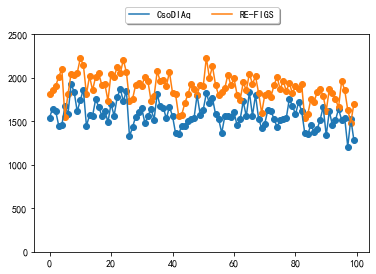

In [16]:
xs = range(100)
plt.plot(xs,num1_100,label="CsoDIAq")
plt.scatter(xs,num1_100)

plt.plot(xs,num2_100,label="RE-FIGS")
plt.scatter(xs,num2_100)
plt.ylim(0,2500)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),fancybox=True, shadow=True, ncol=2)
plt.show()

In [17]:
dict1=dict()
dict2=dict()
for sample in sample1_100:
    dict1[sample] = 0
for sample in sample2_100:
    dict2[sample] = 0
for i in range(100):
    for sample in samplelist1_100[i]:
        dict1[sample] = dict1[sample] + 1
    for sample in samplelist2_100[i]:
        dict2[sample] = dict2[sample] + 1
goodkey1=[]
goodkey2=[]
for key in dict1.keys():
    if dict1[key]>=80:
        goodkey1.append(key)
for key in dict2.keys():
    if dict2[key]>=80:
        goodkey2.append(key)

In [18]:
len(goodkey1)

1133

In [19]:
len(goodkey2)

1275

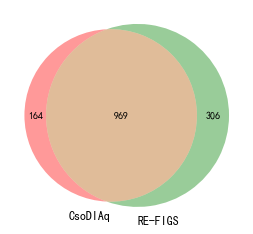

In [20]:
venn2([set(goodkey1),set(goodkey2)],['CsoDIAq','RE-FIGS'])

In [21]:
np.mean(num1_100)

1579.02

In [22]:
np.mean(num2_100)

1883.46

In [23]:
np.mean(num2_100)/np.mean(num1_100)

1.1928031310559715

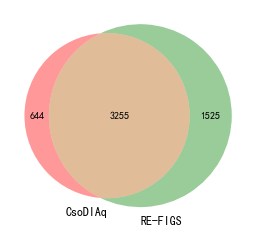

In [24]:
venn2([set(sample1_100),set(sample2_100)],['CsoDIAq','RE-FIGS'])

In [25]:
print(plt.rcParams['axes.prop_cycle'].by_key()['color'])

['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


In [26]:
dirname = "../result/"
filenames = [
    "CsoDIAq-file1_480_20210929_Hela_1ug_noRT_FAIMS_30to80_120ms_40min_250nL_01_corrected_peptideFDR.csv",
    "CsoDIAq-file2_480_20210929_Hela_1ug_noRT_FAIMS_30to80_120ms_40min_250nL_02_corrected_peptideFDR.csv",
    "CsoDIAq-file3_480_20210929_Hela_1ug_noRT_FAIMS_30to80_120ms_40min_250nL_03_corrected_peptideFDR.csv",
    "CsoDIAq-file4_480_20210929_Hela_1ug_noRT_FAIMS_30to80_120ms_40min_250nL_04_corrected_peptideFDR.csv",
    "CsoDIAq-file5_480_20210929_Hela_1ug_noRT_FAIMS_30to80_120ms_40min_250nL_05_corrected_peptideFDR.csv",
    "CsoDIAq-file6_480_20210929_Hela_1ug_noRT_FAIMS_30to80_120ms_40min_250nL_06_corrected_peptideFDR.csv",
    "CsoDIAq-file7_480_20210929_Hela_1ug_noRT_FAIMS_30to80_120ms_40min_250nL_07_corrected_peptideFDR.csv",
    "CsoDIAq-file8_480_20210929_Hela_1ug_noRT_FAIMS_30to80_120ms_40min_250nL_08_corrected_peptideFDR.csv",
    "CsoDIAq-file9_480_20210929_Hela_1ug_noRT_FAIMS_30to80_120ms_40min_250nL_09_corrected_peptideFDR.csv",
    "CsoDIAq-file10_480_20210929_Hela_1ug_noRT_FAIMS_30to80_120ms_40min_250nL_10_corrected_peptideFDR.csv",
    "CsoDIAq-file11_480_20210929_Hela_1ug_noRT_FAIMS_30to80_120ms_40min_250nL_11_corrected_peptideFDR.csv",
    "CsoDIAq-file12_480_20210929_Hela_1ug_noRT_FAIMS_30to80_120ms_40min_250nL_12_corrected_peptideFDR.csv",
]

In [27]:
def peptide_type(x):
    if x.startswith('DECOY-'):
        return 'DECOY_null'
    elif x.startswith('TRAP-'):
        return 'TRAP'
    else:
        return 'SAMPLE'

In [28]:
counts = []
total = pd.DataFrame([])
for filename in filenames:
    csodiaq_id_df = pd.read_csv(os.path.join(dirname,filename))
    csodiaq_id_df['protein'] = csodiaq_id_df['peptide'].apply(peptide_type)
    sample = csodiaq_id_df[csodiaq_id_df['protein']=='SAMPLE']
    trap = csodiaq_id_df[csodiaq_id_df['protein']=='TRAP']
    decoy = csodiaq_id_df[csodiaq_id_df['protein']=='DECOY_null']
    counts.append(len(sample))
    total=pd.concat([total,sample])

In [29]:
peptides = set(total['peptide'].values)
peptide_counts = []
good = []
for pep in tqdm(peptides):
    tmp = total[total['peptide']==pep]
    peptide_counts.append(len(tmp))
    if len(tmp)>=10:
        good.append(pep)

100%|██████████| 9410/9410 [00:32<00:00, 292.45it/s]


In [30]:
ours_filenames = [
    "CsoDIAq-file1_480_20210929_Hela_1ug_noRT_FAIMS_30to80_120ms_40min_250nL_01_correctedNoFilter_withFeature_13cycle_7_5_LDA_ID.csv",
    "CsoDIAq-file2_480_20210929_Hela_1ug_noRT_FAIMS_30to80_120ms_40min_250nL_02_correctedNoFilter_withFeature_13cycle_7_5_LDA_ID.csv",
    "CsoDIAq-file3_480_20210929_Hela_1ug_noRT_FAIMS_30to80_120ms_40min_250nL_03_correctedNoFilter_withFeature_13cycle_7_5_LDA_ID.csv",
    "CsoDIAq-file4_480_20210929_Hela_1ug_noRT_FAIMS_30to80_120ms_40min_250nL_04_correctedNoFilter_withFeature_13cycle_7_5_LDA_ID.csv",
    "CsoDIAq-file5_480_20210929_Hela_1ug_noRT_FAIMS_30to80_120ms_40min_250nL_05_correctedNoFilter_withFeature_13cycle_7_5_LDA_ID.csv",
    "CsoDIAq-file6_480_20210929_Hela_1ug_noRT_FAIMS_30to80_120ms_40min_250nL_06_correctedNoFilter_withFeature_13cycle_7_5_LDA_ID.csv",
    "CsoDIAq-file7_480_20210929_Hela_1ug_noRT_FAIMS_30to80_120ms_40min_250nL_07_correctedNoFilter_withFeature_13cycle_7_5_LDA_ID.csv",
    "CsoDIAq-file8_480_20210929_Hela_1ug_noRT_FAIMS_30to80_120ms_40min_250nL_08_correctedNoFilter_withFeature_13cycle_7_5_LDA_ID.csv",
    "CsoDIAq-file9_480_20210929_Hela_1ug_noRT_FAIMS_30to80_120ms_40min_250nL_09_correctedNoFilter_withFeature_13cycle_7_5_LDA_ID.csv",
    "CsoDIAq-file10_480_20210929_Hela_1ug_noRT_FAIMS_30to80_120ms_40min_250nL_10_correctedNoFilter_withFeature_13cycle_7_5_LDA_ID.csv",
    "CsoDIAq-file11_480_20210929_Hela_1ug_noRT_FAIMS_30to80_120ms_40min_250nL_11_correctedNoFilter_withFeature_13cycle_7_5_LDA_ID.csv",
    "CsoDIAq-file12_480_20210929_Hela_1ug_noRT_FAIMS_30to80_120ms_40min_250nL_12_correctedNoFilter_withFeature_13cycle_7_5_LDA_ID.csv",
]

In [31]:
new_counts = []
total = pd.DataFrame([])
for filename in ours_filenames:
    our_id_df = pd.read_csv(os.path.join(dirname,filename))
    our_id_df['protein'] = our_id_df['peptide'].apply(peptide_type)
    sample = our_id_df[our_id_df['protein']=='SAMPLE']
    trap = our_id_df[our_id_df['protein']=='TRAP']
    decoy = our_id_df[our_id_df['protein']=='DECOY_null']
    new_counts.append(len(sample))
    total=pd.concat([total,sample])

In [32]:
peptides = set(total['peptide'].values)
peptide_counts = []
new_good = []
for pep in tqdm(peptides):
    tmp = total[total['peptide']==pep]
    peptide_counts.append(len(tmp))
    if len(tmp)>=10:
        new_good.append(pep)

100%|██████████| 14142/14142 [01:04<00:00, 220.13it/s]


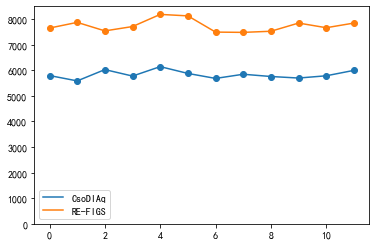

In [33]:
plt.plot(range(len(counts)),counts,label = 'CsoDIAq')
plt.scatter(range(len(counts)),counts)
plt.plot(range(len(new_counts)),new_counts,label = 'RE-FIGS')
plt.scatter(range(len(new_counts)),new_counts)
plt.ylim(0,8500)
plt.legend()
plt.show()

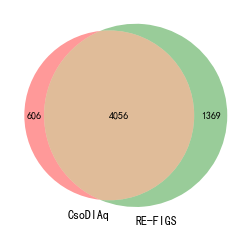

In [34]:
venn2([set(good),set(new_good)],['CsoDIAq','RE-FIGS'])

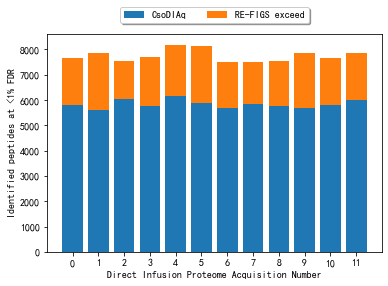

In [35]:
plt.bar(range(len(counts)),counts,  label='CsoDIAq')
plt.bar(range(len(counts)), np.array(new_counts)-np.array(counts), bottom=counts,label='RE-FIGS exceed')
# plt.bar(range(len(counts)), new_counts,label='RE-FIGS',alpha = 0.5)
plt.xlabel('Direct Infusion Proteome Acquisition Number')
plt.ylabel('Identified peptides at <1% FDR')
new_ticks = np.linspace(0,11,12)
plt.xticks(new_ticks)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),fancybox=True, shadow=True, ncol=2)
plt.show()

In [36]:
float(len(set(new_good)))/float(len(set(good)))

1.1636636636636637

In [37]:
np.mean(new_counts)/np.mean(counts)

1.3284030010718113

In [38]:
np.mean(new_counts)

7746.25

In [39]:
len(set(new_good))/np.mean(new_counts)

0.7003388736485396

In [40]:
np.mean(counts)

5831.25

In [41]:
np.std(new_counts)/np.mean(new_counts)

0.029239082060797623

In [42]:
np.mean(new_counts)-np.mean(counts)

1915.0

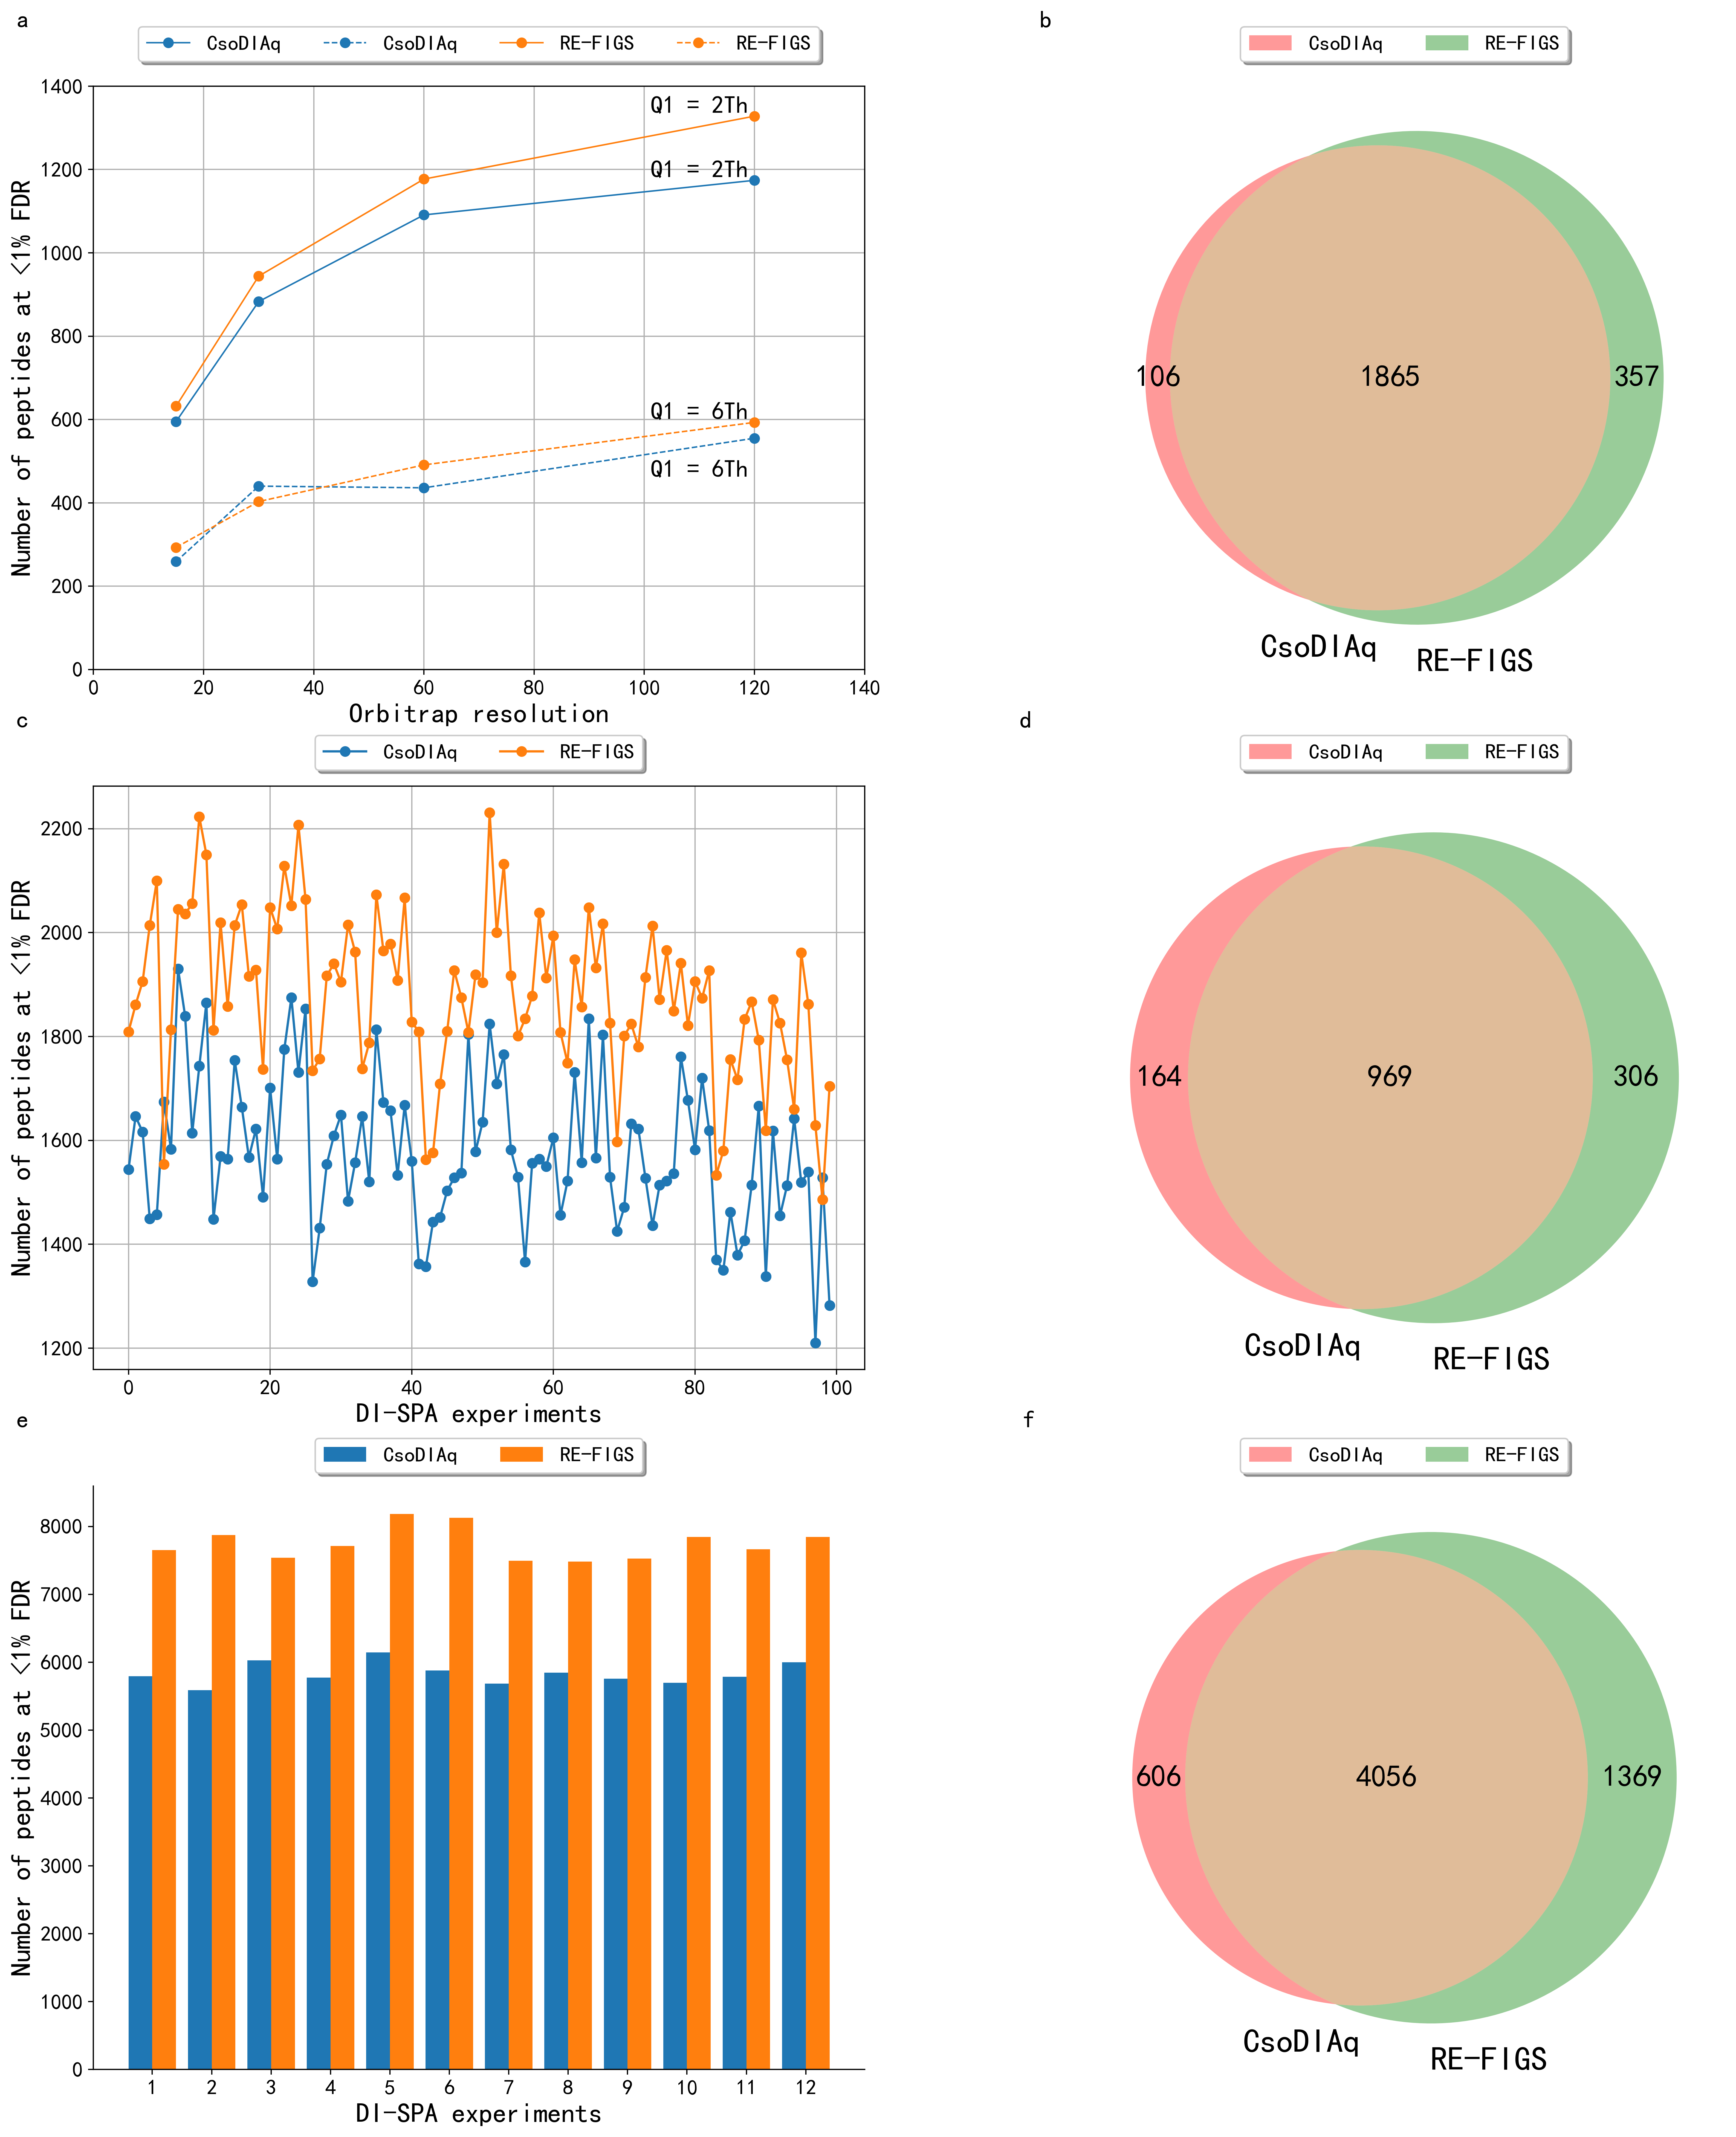

In [43]:
fig, axs = plt.subplots(3,2,figsize=(20,30*0.8),dpi=400)

###################
axs[0][0].plot(x_axis_data, avg_num1_2, 'o-', alpha=1, linewidth=1, label='CsoDIAq',color='#1f77b4')
axs[0][0].plot(x_axis_data, avg_num1_6, 'o--', alpha=1, linewidth=1,label='CsoDIAq',color='#1f77b4')
axs[0][0].plot(x_axis_data, avg_num2_2, 'o-', alpha=1, linewidth=1, label='RE-FIGS',color='#ff7f0e')
axs[0][0].plot(x_axis_data, avg_num2_6, 'o--', alpha=1, linewidth=1,label='RE-FIGS',color='#ff7f0e')

for a, b in zip(x_axis_data, avg_num1_2):
    if a==120:
        axs[0][0].text(a-10, b, "Q1 = 2Th", ha='center', va='bottom', fontsize=16)  #  ha='center', va='top'
for a, b1 in zip(x_axis_data, avg_num1_6):
    if a==120:
        axs[0][0].text(a-10, b1-100, "Q1 = 6Th", ha='center', va='bottom', fontsize=16)  
for a, b2 in zip(x_axis_data, avg_num2_2):
    if a==120:
        axs[0][0].text(a-10, b2, "Q1 = 2Th", ha='center', va='bottom', fontsize=16)
for a, b3 in zip(x_axis_data, avg_num2_6):
    if a==120:
        axs[0][0].text(a-10, b3, "Q1 = 6Th", ha='center', va='bottom', fontsize=16)

axs[0][0].legend(loc='upper center', bbox_to_anchor=(0.5, 1.12),fancybox=True, shadow=True,ncol=4,fontsize=14)
axs[0][0].grid()
axs[0][0].tick_params(labelsize=14)
axs[0][0].set_xlim(0,140)
axs[0][0].set_ylim(0,1400)
axs[0][0].set_xlabel('Orbitrap resolution',fontsize=18)
axs[0][0].set_ylabel('Number of peptides at <1% FDR',fontsize=18)

################
v1=venn2([set(sample1),set(sample2)],['CsoDIAq','RE-FIGS'],ax = axs[0][1])
axs[0][1].legend(['CsoDIAq', 'RE-FIGS'],loc='upper center', bbox_to_anchor=(0.5, 1.12),fancybox=True, shadow=True,ncol=2,fontsize=14)
for t in v1.set_labels:
    t.set_fontsize(22)
for t in v1.subset_labels:
    t.set_fontsize(20)


# custom_lines = [
#     Line2D([0], [0], color='#DDF2C9', lw=4),
#     Line2D([0], [0], color='#A1C6EC', lw=4),
# ]
# v = venn2(subsets = [set(sample1),set(sample2)],set_labels = ['',''],ax=axs[0][1],set_colors=('#DDF2C9','#A1C6EC'),alpha = 1)
# for t in v.subset_labels:
#     t.set_fontsize(20)
# v.get_patch_by_id('11').set_color('#F3E2A9')
# c = venn2_circles(subsets = [set(sample1),set(sample2)],linestyle='dashed',ax=axs[0][1])
# c[0].set_lw(2.0)
# c[1].set_lw(2.0)
# axs[0][1].legend(custom_lines, ['CsoDIAq', 'RE-FIGS'],loc='upper center', bbox_to_anchor=(0.5, 1.1),fancybox=True, shadow=True,ncol=2,fontsize=14)


##########
axs[1][0].plot(xs,num1_100,'o-',label="CsoDIAq")
axs[1][0].scatter(xs,num1_100)

axs[1][0].plot(xs,num2_100,'o-',label="RE-FIGS")
axs[1][0].scatter(xs,num2_100)
axs[1][0].grid()
axs[1][0].tick_params(labelsize=14)
axs[1][0].legend(loc='upper center', bbox_to_anchor=(0.5, 1.105),fancybox=True, shadow=True,ncol=2,fontsize=14)
axs[1][0].set_xlabel('DI-SPA experiments',fontsize=18)
axs[1][0].set_ylabel('Number of peptides at <1% FDR',fontsize=18)

###########
v2=venn2([set(goodkey1),set(goodkey2)],['CsoDIAq','RE-FIGS'],ax = axs[1][1])      
for t in v2.set_labels:
    t.set_fontsize(22)
for t in v2.subset_labels:
    t.set_fontsize(20)
axs[1][1].legend(['CsoDIAq', 'RE-FIGS'],loc='upper center', bbox_to_anchor=(0.5, 1.105),fancybox=True, shadow=True,ncol=2,fontsize=14)

# custom_lines = [
#     Line2D([0], [0], color='#DDF2C9', lw=4),
#     Line2D([0], [0], color='#A1C6EC', lw=4),
# ]
# v = venn2(subsets = [set(goodkey1),set(goodkey2)],set_labels = ['',''],ax=axs[1][1],set_colors=('#DDF2C9','#A1C6EC'),alpha = 1)
# for t in v.subset_labels:
#     t.set_fontsize(20)
# v.get_patch_by_id('11').set_color('#F3E2A9')
# c = venn2_circles(subsets = [set(goodkey1),set(goodkey2)],linestyle='dashed',ax=axs[1][1])
# c[0].set_lw(2.0)
# c[1].set_lw(2.0)
# axs[1][1].legend(custom_lines, ['CsoDIAq', 'RE-FIGS'],loc='upper center', bbox_to_anchor=(0.5, 1.1),fancybox=True, shadow=True,ncol=2,fontsize=14)


################
xarange=np.arange(1,len(counts)+1,1)
mywidth = 0.4
axs[2][0].bar(xarange-0.2,counts,label='CsoDIAq',width=mywidth)
# axs[2][0].bar(range(1,len(counts)+1), np.array(new_counts)-np.array(counts), bottom=counts,label='RE-FIGS',color='#A1C6EC',alpha=1)
axs[2][0].bar(xarange+0.2,np.array(new_counts),label='RE-FIGS',width=mywidth)
axs[2][0].set_xlabel('DI-SPA experiments',fontsize=18)
axs[2][0].set_ylabel('Number of peptides at <1% FDR',fontsize=18)
axs[2][0].tick_params(labelsize=14)
axs[2][0].spines['right'].set_visible(False)
axs[2][0].spines['top'].set_visible(False)
new_ticks = np.linspace(1,12,12)
axs[2][0].set_xticks(new_ticks)
custom_lines = [
    Line2D([0], [0], color='#DDF2C9', lw=4),
    Line2D([0], [0], color='#A1C6EC', lw=4),
]
axs[2][0].legend(['CsoDIAq', 'RE-FIGS'],loc='upper center', bbox_to_anchor=(0.5, 1.1),fancybox=True, shadow=True,ncol=2,fontsize=14)

##########################
# v = venn2(subsets = [set(good),set(new_good)],set_labels = ['',''],ax=axs[2][1],set_colors=('#DDF2C9','#A1C6EC'),alpha = 1)
# for t in v.subset_labels:
#     t.set_fontsize(20)
# v.get_patch_by_id('11').set_color('#F3E2A9')
# c = venn2_circles(subsets = [set(good),set(new_good)],linestyle='dashed',ax=axs[2][1])
# c[0].set_lw(2.0)
# c[1].set_lw(2.0)
# axs[2][1].legend(custom_lines, ['CsoDIAq', 'RE-FIGS'],loc='upper center', bbox_to_anchor=(0.5, 1.1),fancybox=True, shadow=True,ncol=2,fontsize=14)

v3=venn2([set(good),set(new_good)],['CsoDIAq','RE-FIGS'],ax = axs[2][1])      
for t in v3.set_labels:
    t.set_fontsize(22)
for t in v3.subset_labels:
    t.set_fontsize(20)
axs[2][1].legend(['CsoDIAq', 'RE-FIGS'],loc='upper center', bbox_to_anchor=(0.5, 1.1),fancybox=True, shadow=True,ncol=2,fontsize=14)


axs = axs.flat
for n, ax in enumerate(axs):
    # ax.imshow(np.random.randn(10,10), interpolation='none')    
    ax.text(-0.1, 1.1, string.ascii_lowercase[n], transform=ax.transAxes, 
            size=16, weight='bold')
plt.savefig('fig2.jpg')   